In [1]:
from pathlib import Path

import trimesh
import matplotlib.pyplot as plt

from signatures.laplace import laplacian_beltrami
from signatures.signatures import heat_kernel_signatures


In [2]:
file_path = Path("../data/bunny.obj")


In [3]:
mesh = trimesh.load(file_path)
vertices = mesh.vertices
faces = mesh.faces

signature = heat_kernel_signatures(
    mesh = mesh,
    n_basis = 400,
    n_time_steps = 10,
    laplacian = laplacian_beltrami,
    device = "cuda"
)


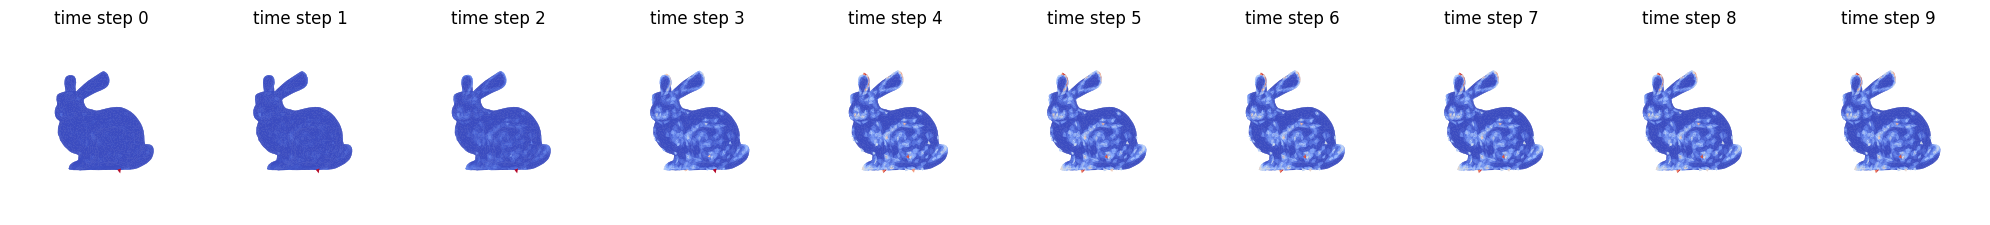

In [4]:
n_steps = signature.shape[1]
fig = plt.figure(figsize=(20, 20*n_steps))
for i in range(n_steps):
    ax = fig.add_subplot(1, n_steps, i+1, projection='3d')
    ax.set_title(f"time step {i}")
    ax.plot_trisurf(vertices[:, 0], vertices[:, 1], signature.cpu()[:, i], triangles=faces, cmap="coolwarm")
    ax.view_init(90, 0, 90)
    ax.set_axis_off()
fig.tight_layout()
